<a href="https://colab.research.google.com/github/carloscesar182/ai_advanced_course/blob/main/Notebooks/MLAlgorithms/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
iris = datasets.load_iris()
iris

In [3]:
# criar uma função genérica pra imprimir os 3 cluster (kmeans, aglomerativo e dbscan)
# vamos identificar ruidos (aqueles -1 que apareceram) e mudar a cor pra preta pra facilitar a visualização
# vai ser um grafico de dispersão
def plot_clusters(data, labels, title):
  colors = ['red', 'green', 'purple', 'black']
  plt.figure(figsize=(8,4))
  for i, c, l in zip(range(-1, 3), colors, ['Noise', 'Setosa', 'Versicolor', 'Virginica']):
    if i == -1:
      plt.scatter(data[labels == i, 0], data[labels == i, 3], c=colors[i], label=l, alpha=0.5, s=50, marker='x')
    else:
      plt.scatter(data[labels == i, 0], data[labels == i, 3], c=colors[i], label=l, alpha=0.5, s=50)
  plt.legend()
  plt.title(title)
  plt.xlabel('Comprimento da Sépala')
  plt.ylabel('Largura da Pétala')
  plt.show()

iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
# chama o cluster kmeans. o parametro mais importante é o n_clusters que indica quantos clusters vamos usar
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(iris.data)
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [5]:
# gera a matriz de confusao
resultados = confusion_matrix(iris.target, kmeans.labels_)
print(resultados)

[[ 0 50  0]
 [ 2  0 48]
 [36  0 14]]


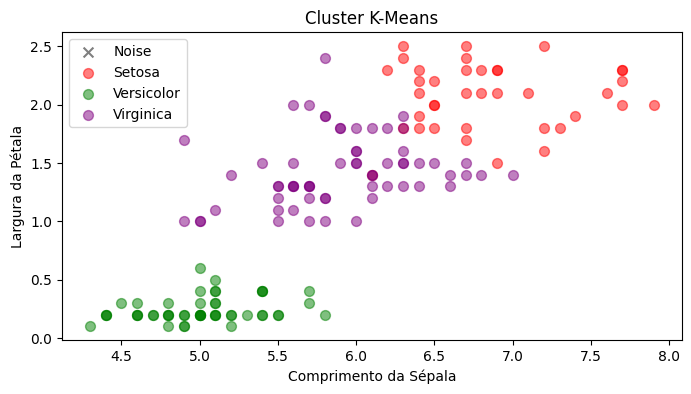

In [6]:
# chama a função plot_custers
plot_clusters(iris.data, kmeans.labels_, 'Cluster K-Means')

In [14]:
# chama mais um cluster, o dbscan
# o dbscan define o número de agrupamentos automaticamente
# o dbscan pode gerar ruido
# eps é a circunferencia que ele busca o agrupamento
# min_samples é o num min de dados que deve estar dentro do eps pra ser considerado um cluster
dbscan = DBSCAN(eps=0.5, min_samples=3)
dbscan_labels = dbscan.fit_predict(iris.data)
print(dbscan_labels)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  2  1  1  2  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  2  1  1
  1  1  2  1  1  1  1  1  1  3 -1  1 -1 -1  1  1  1  1  1  1  1 -1  3  1
  1  1  3  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


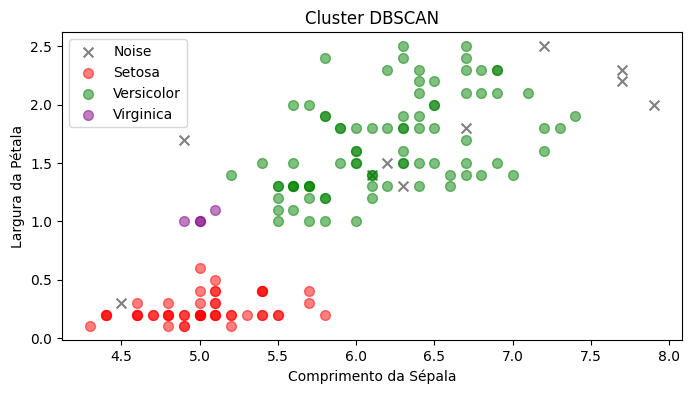

In [8]:
# chama a função
plot_clusters(iris.data, dbscan_labels, 'Cluster DBSCAN')

In [9]:
# chama o terceiro cluster, o cluster hierarquico
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(iris.data)
print(agglo_labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [10]:
# gera a matriz de confusao
resultados = confusion_matrix(iris.target, agglo_labels)
print(resultados)

[[ 0 50  0]
 [49  0  1]
 [15  0 35]]


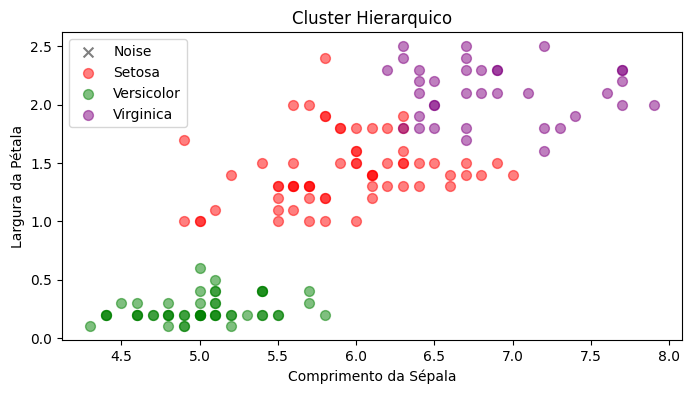

In [11]:
# chama a função
plot_clusters(iris.data, agglo_labels, 'Cluster Hierarquico')

Text(0, 0.5, 'Distância')

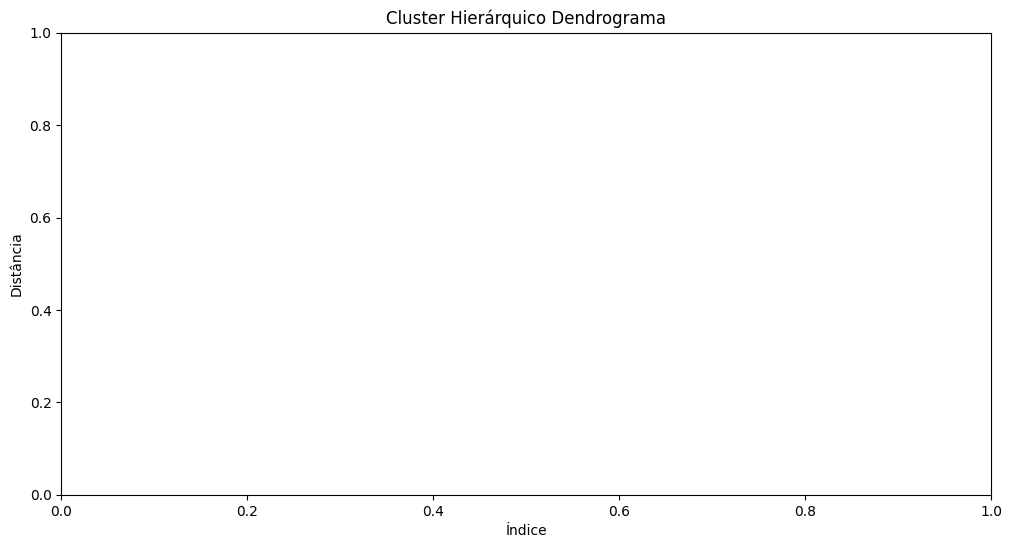

In [12]:
# criar uma modelo da função hierarquica
plt.figure(figsize=(12, 6))
plt.title("Cluster Hierárquico Dendrograma")
plt.xlabel("Índice")
plt.ylabel("Distância")

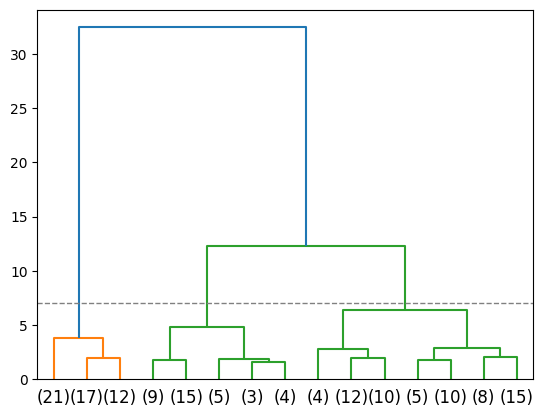

In [13]:
# método linkage que tem a informação hierarquica gerada pelo cluster que vai chamar o dendograma
linkage_matrix = linkage(iris.data, method='ward') # metodo ward é a função usada pra calcular as distancias (usa a soma da diferença dos quadrados de todos os clusters)
dendrogram(linkage_matrix, truncate_mode='lastp', p=15) # define o método a ser usado pra juntar os galhos do dendograma. P é o numero max de folhas
plt.axhline(y=7, c='gray', lw=1, linestyle='dashed') # mostra o ponto que determina o número de clusters
plt.show()